# Get data from image chart

<img src="example_with_getdata_graph_digitizer.jpg" />

# Import packages

In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial as P
import matplotlib.pyplot as plt
%matplotlib notebook
import warnings
from scipy.optimize import curve_fit
import math

# Import data

In [2]:
df=pd.read_excel('Psychrometric_Chart.xls')
df.rename(columns={'Line #1': 'x1',
                   'Unnamed: 1': 'y1',
                   'Line #2': 'x2',
                   'Unnamed: 4': 'y2',
                   'Line #3': 'x3',
                   'Unnamed: 7': 'y3',
                      }, inplace=True)
df=df[['x1','y1','x2','y2','x3','y3']][1:]
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)
df.head()

,x1,y1,x2,y2,x3,y3
0,0.169030,0.769206,-0.111180,2.274183,-0.314588,6.088884
1,0.319420,0.779049,0.037118,2.295892,-0.176741,6.148169
2,0.469808,0.794825,0.183326,2.325512,-0.040984,6.211409
3,0.618107,0.814556,0.331623,2.353153,0.090595,6.278606
4,0.762230,0.824401,0.477833,2.376840,0.224262,6.343825


# Remove nan

In [3]:
def remove_nan(l):
    l_n=[]
    for value in l:
        l_n.append(value)
        if math.isnan(l_n[-1]):      
            break
    return l_n[:-1]

x1=remove_nan(df.x1.tolist())
y1=remove_nan(df.y1.tolist())
x2=remove_nan(df.x2.tolist())
y2=remove_nan(df.y2.tolist())
x3=remove_nan(df.x3.tolist())
y3=remove_nan(df.y3.tolist())

# Draw plot

<IPython.core.display.Javascript object>


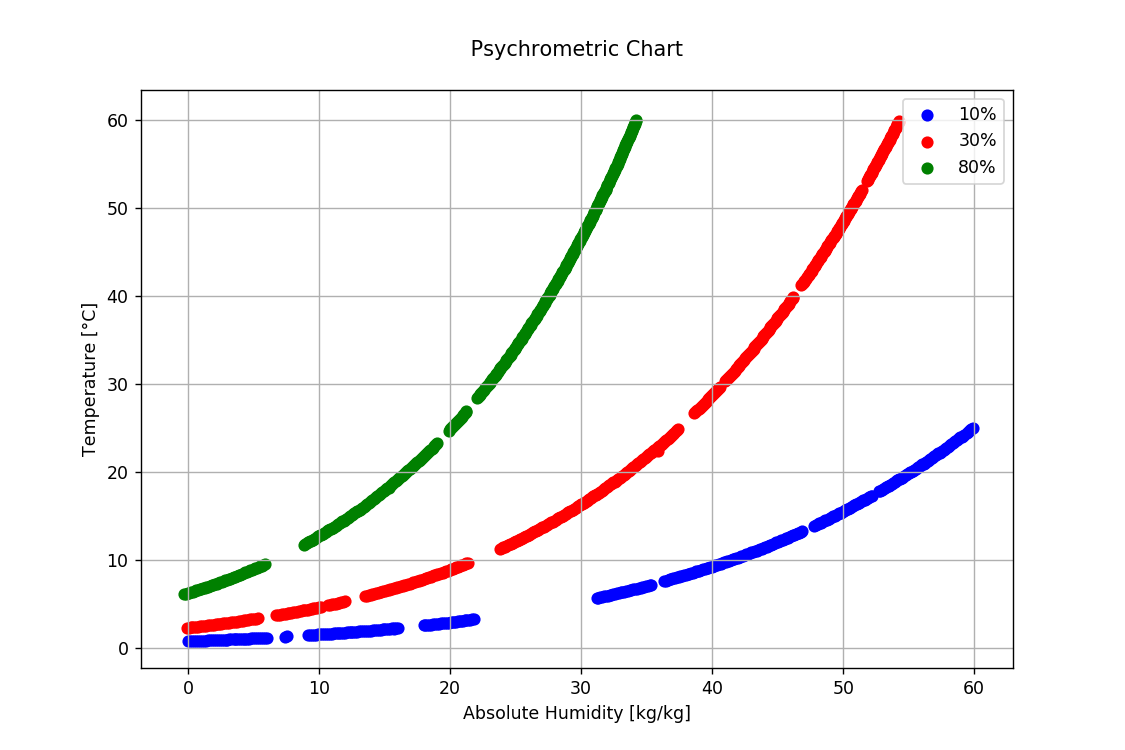

In [4]:
if True:
    plt.figure(figsize=(9,6))
    plt.grid()
    plt.xlabel('Absolute Humidity [kg/kg]')
    plt.ylabel('Temperature [°C]')
    plt.title('\n Psychrometric Chart \n')
    plt.scatter(x1, y1,color='blue',label='10%')
    plt.scatter(x2, y2,color='red',label='30%')
    plt.scatter(x3, y3,color='green',label='80%')
    plt.legend()
    plt.show()

# Fit plot

<IPython.core.display.Javascript object>


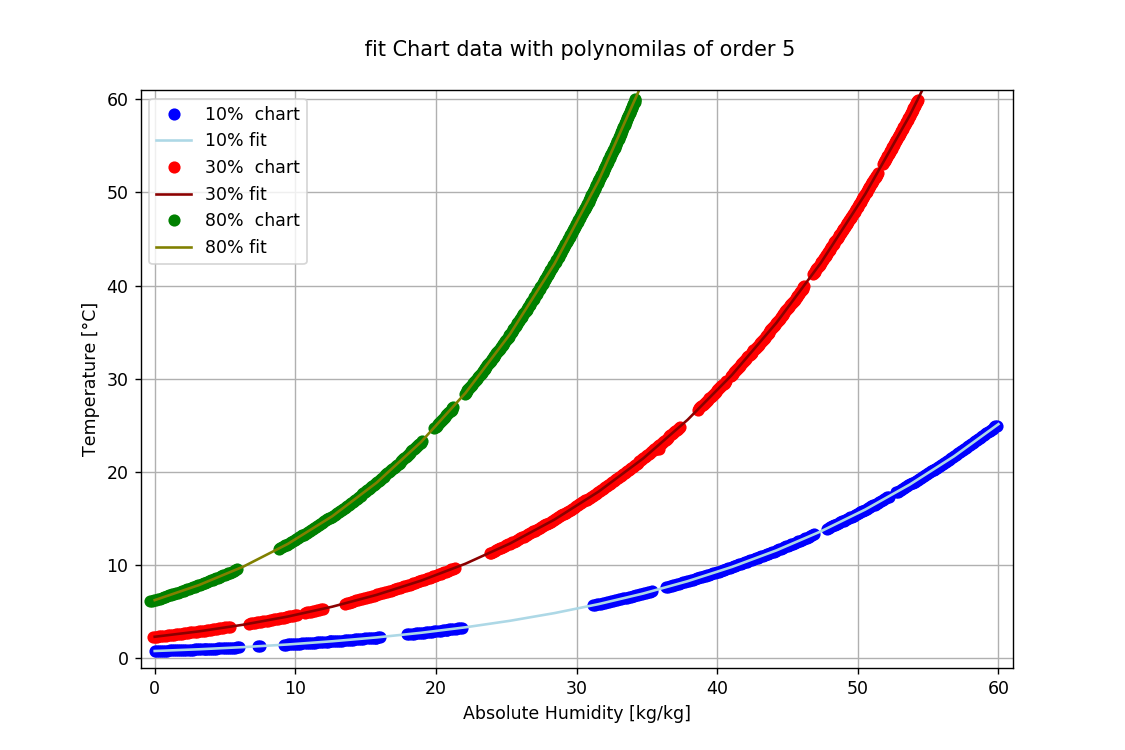

In [5]:
# fit with polynome using warnings

#coef
polynome_order=5
coef_1 = np.polyfit(x1, y1, polynome_order)
coef_2 = np.polyfit(x2, y2, polynome_order)
coef_3 = np.polyfit(x3, y3, polynome_order)

#polynomials
pol_1=np.poly1d(coef_1) 
pol_2=np.poly1d(coef_2) 
pol_3=np.poly1d(coef_3) 

if True:#plot
    x1_fit = np.linspace(0, 60, num = 20, endpoint = True)
    y1_fit = pol_1(x1_fit)
    
    x2_fit = np.linspace(0, 60, num = 20, endpoint = True)
    y2_fit = pol_2(x2_fit)

    x3_fit = np.linspace(0, 60, num = 20, endpoint = True)
    y3_fit = pol_3(x3_fit)

    plt.figure(figsize=(9,6))
    plt.grid()
    plt.xlabel('Absolute Humidity [kg/kg]')
    plt.ylabel('Temperature [°C]')
    plt.title('\n fit Chart data with polynomilas of order {}\n'.format(polynome_order))
    plt.plot(x1, y1,'o', label='10%  chart',color='blue')
    plt.plot(x1_fit, y1_fit,label='10% fit',color='lightblue')
    
    plt.plot(x2, y2,'o', label='30%  chart',color='red')
    plt.plot(x2_fit, y2_fit,label='30% fit',color='darkred')
    
    plt.plot(x3, y3,'o', label='80%  chart',color='green')
    plt.plot(x3_fit, y3_fit,label='80% fit',color='olive')
    plt.xlim(-1,61)
    plt.ylim(-1,61)
    plt.legend()
    plt.show()
    